<a href="https://colab.research.google.com/github/shinjangwoon/jangwoonshin/blob/practice/%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 필요한 라이브러리 로딩


In [ ]:
# 필요한 라이브러리 로딩
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

##  Google Colab 에서 시각화할때 한글 지원 테스트 코드

Text(0.3, 0.3, '테스트')

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53580 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49828 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53944 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 53580 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 49828 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 53944 missing from current font.
  font.set_text

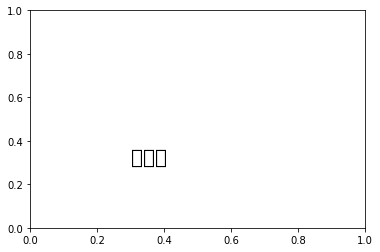

In [ ]:
plt.text(0.3, 0.3, '테스트', size=20)

* Google Collab 에서 maplotlib 이 한글 지원하도록 설정하기
1.   아래 코드 수행하여 Nanum 폰트 설치 및 폰트 설정 
2.   런타임 > 런타임 다시 시작 누르고 1번 코드 다시 실행


In [ ]:
!apt -qq -y install fonts-nanum > /dev/null
 
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
 
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=10)
fm._rebuild()
 
# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'
 
# Colab 의 한글 폰트 설정
plt.rc('font', family='NanumBarunGothic') 

# 마이너스 폰트 깨지지 않도록 설정
plt.rc("axes", unicode_minus=False)

Text(0.3, 0.3, '테스트')

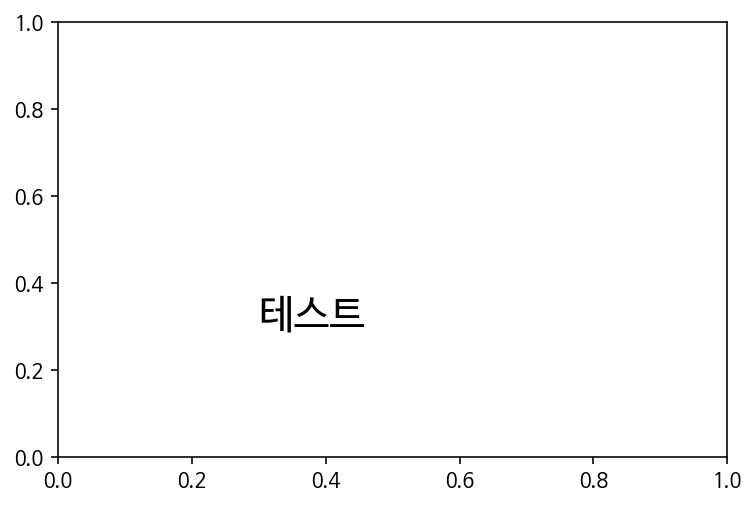

In [ ]:
plt.text(0.3, 0.3, '테스트', size=20)

# 데이터 로딩
- 공공자전거 이용정보(시간대별)_21.01 --> bike_2101_utf8_0618
- 공공자전거 대여소 정보(21.01.31 기준) --> bike_station_2101

In [ ]:
url='https://codepresso-online-platform-public.s3.ap-northeast-2.amazonaws.com/learning-resourse/python-data-analysis/bike_2101_utf8_0618.csv'

In [ ]:
# 데이터 로드 및 출력
bike_data = pd.read_csv(url)
bike_data.head()

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리,사용시간
0,2021-01-01,0,1347,1347. 길음래미안아파트817동 상가 앞,정기권,NaN,~10대,2,28.90,0.23,992.78,13
1,2021-01-01,0,1349,1349. 월계2교 버스정류장 앞,정기권,NaN,~10대,1,34.38,0.26,1127.50,10
2,2021-01-01,0,1168,1168. 마곡엠밸리10단지 앞,정기권,NaN,~10대,1,0.00,0.00,0.00,7
3,2021-01-01,0,2619,2619. 석촌고분역 4번출구,정기권,NaN,~10대,1,38.75,0.38,1658.34,14
4,2021-01-01,0,536,536. 행당역 2번출구 앞,정기권,NaN,~10대,1,12.96,0.17,743.88,5


# 데이터 둘러보기
- bike_data 데이터 탐색

In [ ]:
# bike_data 의 컬럼명 확인 
bike_data.columns

Index(['대여일자', '대여시간', '대여소번호', '대여소명', '대여구분코드', '성별', '연령대코드', '이용건수', '운동량',
       '탄소량', '이동거리', '사용시간'],
      dtype='object')

In [ ]:
# 첫 행 읽기
bike_data.head()

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리,사용시간
0,2021-01-01,0,1347,1347. 길음래미안아파트817동 상가 앞,정기권,NaN,~10대,2,28.90,0.23,992.78,13
1,2021-01-01,0,1349,1349. 월계2교 버스정류장 앞,정기권,NaN,~10대,1,34.38,0.26,1127.50,10
2,2021-01-01,0,1168,1168. 마곡엠밸리10단지 앞,정기권,NaN,~10대,1,0.00,0.00,0.00,7
3,2021-01-01,0,2619,2619. 석촌고분역 4번출구,정기권,NaN,~10대,1,38.75,0.38,1658.34,14
4,2021-01-01,0,536,536. 행당역 2번출구 앞,정기권,NaN,~10대,1,12.96,0.17,743.88,5


In [ ]:
# 마지막 행 읽기
bike_data.tail(3)

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리,사용시간
718854,2021-01-31,23,248,248. 초원아파트 앞,단체권,NaN,20대,2,348.43,2.91,12569.64,90
718855,2021-01-31,23,131,131. 증산2교,단체권,NaN,20대,2,98.10,0.77,3302.87,20
718856,2021-01-31,23,247,247. 당산역 10번출구 앞,단체권,M,40대,1,223.71,2.02,8691.10,52


In [ ]:
# 행과 열 데이터의 shape 은?
bike_data.shape

(718857, 12)

In [ ]:
# 전체 데이터셋 정보 파악
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 718857 entries, 0 to 718856
Data columns (total 12 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   대여일자    718857 non-null  object 
 1   대여시간    718857 non-null  int64  
 2   대여소번호   718857 non-null  int64  
 3   대여소명    718857 non-null  object 
 4   대여구분코드  718857 non-null  object 
 5   성별      401235 non-null  object 
 6   연령대코드   718857 non-null  object 
 7   이용건수    718857 non-null  int64  
 8   운동량     718857 non-null  object 
 9   탄소량     718857 non-null  object 
 10  이동거리    718857 non-null  float64
 11  사용시간    718857 non-null  int64  
dtypes: float64(1), int64(4), object(7)
memory usage: 65.8+ MB


In [ ]:
# bike_data 의 기술 통계 요약 확인
bike_data.describe()

,대여시간,대여소번호,이용건수,이동거리,사용시간
count,718857.000000,718857.000000,718857.000000,718857.000000,718857.000000
mean,14.197045,1447.329716,1.088958,3033.891521,28.062467
std,5.245045,1015.266910,0.339713,4280.828411,33.246788
min,0.000000,3.000000,1.000000,0.000000,0.000000
25%,11.000000,600.000000,1.000000,789.020000,8.000000
50%,15.000000,1230.000000,1.000000,1680.000000,16.000000
75%,18.000000,2113.000000,1.000000,3569.610000,37.000000
max,23.000000,9999.000000,14.000000,248420.000000,1753.000000


# 데이터 전처리

## 데이터의 탐색적 분석(EDA) : 컬럼별 데이터 분석

In [ ]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 718857 entries, 0 to 718856
Data columns (total 12 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   대여일자    718857 non-null  object 
 1   대여시간    718857 non-null  int64  
 2   대여소번호   718857 non-null  int64  
 3   대여소명    718857 non-null  object 
 4   대여구분코드  718857 non-null  object 
 5   성별      401235 non-null  object 
 6   연령대코드   718857 non-null  object 
 7   이용건수    718857 non-null  int64  
 8   운동량     718857 non-null  object 
 9   탄소량     718857 non-null  object 
 10  이동거리    718857 non-null  float64
 11  사용시간    718857 non-null  int64  
dtypes: float64(1), int64(4), object(7)
memory usage: 65.8+ MB


In [ ]:
bike_data.sample(5)

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리,사용시간
255664,2021-01-15,9,1397,1397.래미안월곡아파트 (창문여고 건너편),정기권,NaN,20대,1,334.52,2.31,9938.27,41
189989,2021-01-12,1,2823,2823.중앙유통단지 앞,일일권,M,~10대,1,139.70,1.26,5427.42,44
214212,2021-01-13,18,292,292. 영일 어린이공원,정기권,M,60대,1,92.05,0.83,3576.08,84
676768,2021-01-30,17,474,474.동대문역사문화공원역 1번출구 뒤편,정기권,M,60대,1,28.40,0.27,1175.69,8
355594,2021-01-19,21,339,339. 종로4가 사거리,정기권,NaN,20대,1,112.51,0.89,3839.46,26


### 대여구분코드가 어떤 데이터를 저장하는지 살펴볼까요?

In [ ]:
# 범주형 데이터 둘러보기
# 1) bike_data['대여구분코드']
# unique()
bike_data['대여구분코드'].unique()

array(['정기권', '일일권', '단체권', '일일권(비회원)'], dtype=object)

In [ ]:
# 범주형 데이터의 빈도수 확인하기
bike_data['대여구분코드'].value_counts()

정기권         585211
일일권         130415
단체권           3224
일일권(비회원)         7
Name: 대여구분코드, dtype: int64

In [ ]:
# 각 항목별 비율 확인
bike_data['대여구분코드'].value_counts(normalize=True)

정기권         0.814085
일일권         0.181420
단체권         0.004485
일일권(비회원)    0.000010
Name: 대여구분코드, dtype: float64

### 운동량 컬럼 데이터를 살펴볼까요?

In [ ]:
# 범주형 데이터 둘러보기
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 718857 entries, 0 to 718856
Data columns (total 12 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   대여일자    718857 non-null  object 
 1   대여시간    718857 non-null  int64  
 2   대여소번호   718857 non-null  int64  
 3   대여소명    718857 non-null  object 
 4   대여구분코드  718857 non-null  object 
 5   성별      401235 non-null  object 
 6   연령대코드   718857 non-null  object 
 7   이용건수    718857 non-null  int64  
 8   운동량     718857 non-null  object 
 9   탄소량     718857 non-null  object 
 10  이동거리    718857 non-null  float64
 11  사용시간    718857 non-null  int64  
dtypes: float64(1), int64(4), object(7)
memory usage: 65.8+ MB


In [ ]:
bike_data.head()

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리,사용시간
0,2021-01-01,0,1347,1347. 길음래미안아파트817동 상가 앞,정기권,NaN,~10대,2,28.90,0.23,992.78,13
1,2021-01-01,0,1349,1349. 월계2교 버스정류장 앞,정기권,NaN,~10대,1,34.38,0.26,1127.50,10
2,2021-01-01,0,1168,1168. 마곡엠밸리10단지 앞,정기권,NaN,~10대,1,0.00,0.00,0.00,7
3,2021-01-01,0,2619,2619. 석촌고분역 4번출구,정기권,NaN,~10대,1,38.75,0.38,1658.34,14
4,2021-01-01,0,536,536. 행당역 2번출구 앞,정기권,NaN,~10대,1,12.96,0.17,743.88,5


In [ ]:
# 범주형 데이터의 기술통계요역보기
bike_data['운동량'].describe()

count     718857
unique     51422
top         0.00
freq       73806
Name: 운동량, dtype: object

In [ ]:
# 결측치는?
bike_data['운동량'].isnull().sum()

0

In [ ]:
# 패턴매치로 이상값 찾기
pattern='([0-9])'  # 0~9 값으로 match 되면 true, 안되면 false
bike_data['temp'] = bike_data['운동량'].str.match(pattern)
bike_data.head()

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리,사용시간,temp
0,2021-01-01,0,1347,1347. 길음래미안아파트817동 상가 앞,정기권,NaN,~10대,2,28.90,0.23,992.78,13,True
1,2021-01-01,0,1349,1349. 월계2교 버스정류장 앞,정기권,NaN,~10대,1,34.38,0.26,1127.50,10,True
2,2021-01-01,0,1168,1168. 마곡엠밸리10단지 앞,정기권,NaN,~10대,1,0.00,0.00,0.00,7,True
3,2021-01-01,0,2619,2619. 석촌고분역 4번출구,정기권,NaN,~10대,1,38.75,0.38,1658.34,14,True
4,2021-01-01,0,536,536. 행당역 2번출구 앞,정기권,NaN,~10대,1,12.96,0.17,743.88,5,True


In [ ]:
bike_data.loc[bike_data['temp'] == False, '운동량']

57        \N
78        \N
240       \N
311       \N
397       \N
          ..
717806    \N
718106    \N
718242    \N
718591    \N
718619    \N
Name: 운동량, Length: 4569, dtype: object

In [ ]:
# 특수문자로 되어 있는 특정 데이터셋은 결측지(NaN)로 바꿉니다.
# dropna(), fillna(value)

In [ ]:
# 비정상적인 값은 효과적인 처리를 위해 결측치로 채우기
bike_data.loc[bike_data['운동량']  == '\\N' , '운동량'] = np.nan


In [ ]:
# 결측치 개수 확인
bike_data['운동량'].isnull().sum()

4569

In [ ]:
# 임시로 생성한 temp 컬럼 삭제
# drop(columns=['']. inplace=True)
bike_data.drop(columns=['temp'], inplace=True)

In [ ]:
bike_data.head()

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리,사용시간
0,2021-01-01,0,1347,1347. 길음래미안아파트817동 상가 앞,정기권,NaN,~10대,2,28.90,0.23,992.78,13
1,2021-01-01,0,1349,1349. 월계2교 버스정류장 앞,정기권,NaN,~10대,1,34.38,0.26,1127.50,10
2,2021-01-01,0,1168,1168. 마곡엠밸리10단지 앞,정기권,NaN,~10대,1,0.00,0.00,0.00,7
3,2021-01-01,0,2619,2619. 석촌고분역 4번출구,정기권,NaN,~10대,1,38.75,0.38,1658.34,14
4,2021-01-01,0,536,536. 행당역 2번출구 앞,정기권,NaN,~10대,1,12.96,0.17,743.88,5


- 데이터 타입 변경

In [ ]:
# 데이터 타입 문자열에서 실수형으로 변환
bike_data['운동량'].astype(float)

0          28.90
1          34.38
2           0.00
3          38.75
4          12.96
           ...  
718852    916.66
718853    492.87
718854    348.43
718855     98.10
718856    223.71
Name: 운동량, Length: 718857, dtype: float64

In [ ]:
# 데이터 타입 문자열에서 실수형으로 변환
bike_data['운동량'] = bike_data['운동량'].astype(float)

In [ ]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 718857 entries, 0 to 718856
Data columns (total 12 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   대여일자    718857 non-null  object 
 1   대여시간    718857 non-null  int64  
 2   대여소번호   718857 non-null  int64  
 3   대여소명    718857 non-null  object 
 4   대여구분코드  718857 non-null  object 
 5   성별      401235 non-null  object 
 6   연령대코드   718857 non-null  object 
 7   이용건수    718857 non-null  int64  
 8   운동량     714288 non-null  float64
 9   탄소량     718857 non-null  object 
 10  이동거리    718857 non-null  float64
 11  사용시간    718857 non-null  int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 65.8+ MB


### 탄소량 컬럼 데이터를 살펴볼까요?

In [ ]:
# 범주형 데이터 둘러보기


In [ ]:
# 범주형 데이터 기술통계 둘러보기


In [ ]:
# 범주형 데이터의 결측치는?


In [ ]:
# 패턴매치로 이상값 찾기
pattern='([0-9])'

In [ ]:
# 비정상적인 값은 효과적인 처리를 위해 결측치로 채우기


In [ ]:
# 결측치 개수 확인


In [ ]:
# 임시로 생성한 temp 컬럼 삭제


In [ ]:
# 데이터 타입 문자열에서 실수형으로 변환


## 데이터 전처리 : 결측치 처리

In [ ]:
# 결측치 확인
bike_data.isnull().sum()

대여일자           0
대여시간           0
대여소번호          0
대여소명           0
대여구분코드         0
성별        317622
연령대코드          0
이용건수           0
운동량         4569
탄소량            0
이동거리           0
사용시간           0
dtype: int64

### 성별 컬럼 데이터를 살펴볼까요?

In [ ]:
# 성별 컬럼의 범주형 데이터 확인하기
bike_data['성별'].unique()

array([nan, 'F', 'M', 'f', 'm'], dtype=object)

In [ ]:
# 성별 컬럼의 빈도수 확인
bike_data['성별'].value_counts()

M    262477
F    138500
m       212
f        46
Name: 성별, dtype: int64

In [ ]:
# 동일 카테고리 값 M, m, F, f 혼용 --> 대문자 일괄 통일
bike_data['성별'] = bike_data['성별'].str.upper()

In [ ]:
# 성별 컬럼의 빈도수 확인
bike_data['성별'].value_counts() # 결측치에 대한 빈도수는 보여주지 않습니다.

M    262689
F    138546
Name: 성별, dtype: int64

In [ ]:
# 결측치 데이터 조회
bike_data[bike_data['성별'].isnull()]

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리,사용시간
0,2021-01-01,0,1347,1347. 길음래미안아파트817동 상가 앞,정기권,NaN,~10대,2,28.90,0.23,992.78,13
1,2021-01-01,0,1349,1349. 월계2교 버스정류장 앞,정기권,NaN,~10대,1,34.38,0.26,1127.50,10
2,2021-01-01,0,1168,1168. 마곡엠밸리10단지 앞,정기권,NaN,~10대,1,0.00,0.00,0.00,7
3,2021-01-01,0,2619,2619. 석촌고분역 4번출구,정기권,NaN,~10대,1,38.75,0.38,1658.34,14
4,2021-01-01,0,536,536. 행당역 2번출구 앞,정기권,NaN,~10대,1,12.96,0.17,743.88,5
...,...,...,...,...,...,...,...,...,...,...,...,...
718851,2021-01-31,23,3789,3789. 염창나들목,단체권,NaN,~10대,2,104.92,0.82,3532.68,26
718852,2021-01-31,23,207,207. 여의나루역 1번출구 앞,단체권,NaN,~10대,5,916.66,8.66,37335.95,219
718853,2021-01-31,23,3549,3549.건영아파트 앞,단체권,NaN,20대,2,492.87,4.51,19447.10,133
718854,2021-01-31,23,248,248. 초원아파트 앞,단체권,NaN,20대,2,348.43,2.91,12569.64,90


In [ ]:
bike_data['성별'].isnull().sum()

317622

In [ ]:
# Pie 차트로 시각화


In [ ]:
# 결측값을 'U'(Unknown)으로 처리, 범주형 데이터이기에 대체값은 없다. 
# fillna(value)
# 조건 {key:value}
bike_data.fillna({'성별':'U'}, inplace=True)


In [ ]:
bike_data['성별'].isnull().sum()

0

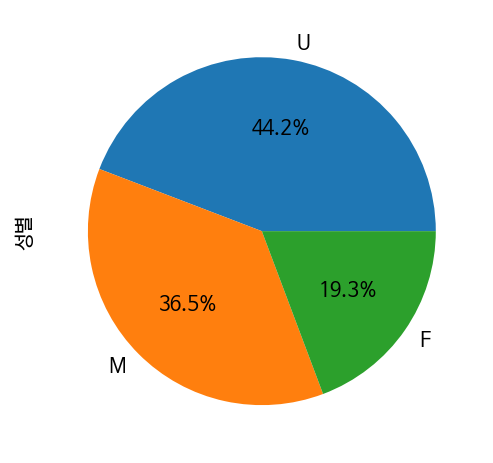

In [ ]:
result = bike_data['성별'].value_counts()
result.plot.pie(autopct='%1.1f%%')

### 운동량 컬럼 데이터를 살펴볼까요?

In [ ]:
# 결측치 데이터 조회
bike_data['운동량'].isnull().sum()

4569

In [ ]:
# 운동량의 평균값은? mean()
bike_data['운동량'].mean()

82.05255287783059

In [ ]:
# 탄소량의 평균값은?

In [ ]:
#[방법1] 123개의 결측치를 평균 값으로 대체하다면?
bike_data.fillna(['운동량':bike_data['운동량'].mean()], inplace=True)

SyntaxError: ignored

In [ ]:
#[방법2] 123개의 결측치가 한개라도 있는 데이터를 삭제한다면?
bike_data.dropna(inplace=True)

In [ ]:
bike_data.isnull().sum()

대여일자      0
대여시간      0
대여소번호     0
대여소명      0
대여구분코드    0
성별        0
연령대코드     0
이용건수      0
운동량       0
탄소량       0
이동거리      0
사용시간      0
dtype: int64

## 이상치 처리

In [ ]:
bike_data.describe()

### IQR 기반의 이상치 찾기

In [ ]:
# IQR 활용한 이상치 함수 구현
def outliers_iqr(data, iqr_range):
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    iqr = q3 - q1
    lower_bound = q1 - (iqr * iqr_range)
    upper_bound = q3 + (iqr * iqr_range)
    return data[(data > upper_bound) | (data < lower_bound)].index

In [ ]:
bike_data.describe()

,대여시간,대여소번호,이용건수,운동량,이동거리,사용시간
count,714288.000000,714288.000000,714288.000000,714288.000000,714288.000000,714288.000000
mean,14.198370,1447.288182,1.089506,82.052553,3053.298050,27.952880
std,5.245724,1015.104043,0.340697,117.619759,4287.593558,33.114494
min,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000
25%,11.000000,601.000000,1.000000,21.090000,802.147500,8.000000
50%,15.000000,1230.000000,1.000000,45.070000,1694.905000,16.000000
75%,18.000000,2113.000000,1.000000,96.050000,3590.330000,36.000000
max,23.000000,9999.000000,14.000000,8621.750000,248420.000000,1753.000000


In [ ]:
# '이동거리' 컬럼 값 기준으로 이상치 찾기
result = outliers_iqr(bike_data['이동거리'], 1.5)
result.size

65735

In [ ]:
# iqr range 를 3으로 조정하면?
result = outliers_iqr(bike_data['이동거리'], 3)
result.size

29328

In [ ]:
# outliers 의 인덱스 값 이용하여 행 조회
bike_data.loc[result]

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리,사용시간
41,2021-01-01,0,709,709. 신정3동 현장민원실 앞,정기권,U,20대,1,478.03,4.31,18571.32,138
217,2021-01-01,0,458,458. 광화문역 5번출구,정기권,M,30대,1,426.08,3.37,14540.00,88
318,2021-01-01,0,797,797.목동아파트 1422동 1434동 사잇길,일일권,U,20대,2,281.98,3.00,12946.65,212
336,2021-01-01,0,2525,2525.반포쇼핑타운 2동 앞,일일권,F,~10대,2,335.76,3.28,14116.22,202
353,2021-01-01,0,3002,3002.벽산상암스마트큐브,일일권,M,20대,1,738.97,6.37,27442.45,152
...,...,...,...,...,...,...,...,...,...,...,...,...
718846,2021-01-31,23,2329,2329. 르네상스호텔사거리 역삼지하보도 2번출구,일일권,M,30대,1,499.05,3.65,15752.91,107
718848,2021-01-31,23,676,676.FITI시험연구원 앞,일일권,M,40대,1,586.40,4.40,18984.69,112
718852,2021-01-31,23,207,207. 여의나루역 1번출구 앞,단체권,U,~10대,5,916.66,8.66,37335.95,219
718853,2021-01-31,23,3549,3549.건영아파트 앞,단체권,U,20대,2,492.87,4.51,19447.10,133


In [ ]:
# 이상치 존재하는 행 제거하여 원본에 반영
bike_data.drop(result, inplace=True)

In [ ]:
bike_data.head()

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리,사용시간
0,2021-01-01,0,1347,1347. 길음래미안아파트817동 상가 앞,정기권,U,~10대,2,28.90,0.23,992.78,13
1,2021-01-01,0,1349,1349. 월계2교 버스정류장 앞,정기권,U,~10대,1,34.38,0.26,1127.50,10
2,2021-01-01,0,1168,1168. 마곡엠밸리10단지 앞,정기권,U,~10대,1,0.00,0.00,0.00,7
3,2021-01-01,0,2619,2619. 석촌고분역 4번출구,정기권,U,~10대,1,38.75,0.38,1658.34,14
4,2021-01-01,0,536,536. 행당역 2번출구 앞,정기권,U,~10대,1,12.96,0.17,743.88,5


# 데이터 결합

- 서울특별시 공공자전거 대여소 정보
- http://data.seoul.go.kr/dataList/OA-13252/F/1/datasetView.do
- 파일명 : 공공자전거 대여소 정보(21.01.31 기준) --> bike_station_2101.csv

In [ ]:
url_station = 'https://codepresso-online-platform-public.s3.ap-northeast-2.amazonaws.com/learning-resourse/python-data-analysis/bike_station_2101.csv'

In [ ]:
bike_station = pd.read_csv(url_station, encoding='cp949', header=4)

In [ ]:
#head 로 다시 읽기
bike_station.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,301.0,경복궁역 7번출구 앞,종로구,서울특별시 종로구 사직로 지하130,37.575794,126.971451,2015-10-07,16.0,NaN,LCD
1,302.0,경복궁역 4번출구 뒤,종로구,서울특별시 종로구 사직로 지하130,37.575947,126.974060,2015-10-07,12.0,NaN,LCD
2,303.0,광화문역 1번출구 앞,종로구,서울특별시 종로구 세종대로 지하189,37.571770,126.974663,2015-10-07,8.0,NaN,LCD
3,304.0,광화문역 2번출구 앞,종로구,서울특별시 종로구 세종대로 지하172,37.572113,126.977577,2021-01-26,NaN,7.0,QR
4,305.0,종로구청 옆,종로구,서울특별시 종로구 삼봉로 43,37.572582,126.978355,2015-10-07,16.0,NaN,LCD


In [ ]:
# 슬라이싱을 통해 필요한 컬럼만 저장
bike_station = bike_station.iloc[:, 0:6]
bike_station.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,301.0,경복궁역 7번출구 앞,종로구,서울특별시 종로구 사직로 지하130,37.575794,126.971451
1,302.0,경복궁역 4번출구 뒤,종로구,서울특별시 종로구 사직로 지하130,37.575947,126.974060
2,303.0,광화문역 1번출구 앞,종로구,서울특별시 종로구 세종대로 지하189,37.571770,126.974663
3,304.0,광화문역 2번출구 앞,종로구,서울특별시 종로구 세종대로 지하172,37.572113,126.977577
4,305.0,종로구청 옆,종로구,서울특별시 종로구 삼봉로 43,37.572582,126.978355


In [ ]:
# 컬럼명 저장
# ['대여소번호', '보관소', '소재지', '주소', '위도', '경도',]
bike_station.columns = ['대여소번호', '보관소', '소재지', '주소', '위도', '경도',]

In [ ]:
# 전체 정보 확인
bike_station.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2157 entries, 0 to 2156
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   대여소번호   2154 non-null   float64
 1   보관소     2154 non-null   object 
 2   소재지     2154 non-null   object 
 3   주소      2154 non-null   object 
 4   위도      2042 non-null   float64
 5   경도      2042 non-null   float64
dtypes: float64(3), object(3)
memory usage: 101.2+ KB


In [ ]:
# 결측치 확인
bike_station.head()

,대여소번호,보관소,소재지,주소,위도,경도
0,301.0,경복궁역 7번출구 앞,종로구,서울특별시 종로구 사직로 지하130,37.575794,126.971451
1,302.0,경복궁역 4번출구 뒤,종로구,서울특별시 종로구 사직로 지하130,37.575947,126.974060
2,303.0,광화문역 1번출구 앞,종로구,서울특별시 종로구 세종대로 지하189,37.571770,126.974663
3,304.0,광화문역 2번출구 앞,종로구,서울특별시 종로구 세종대로 지하172,37.572113,126.977577
4,305.0,종로구청 옆,종로구,서울특별시 종로구 삼봉로 43,37.572582,126.978355


In [ ]:
# 결측치 데이터 조회


In [ ]:
# 모든 행 데이터가 결측치인 경우의 데이터 제거


- 대여소 번호를 기준으로 결합시켜볼까요?

In [ ]:
# bike_data 정보 다시 확인
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714288 entries, 0 to 718856
Data columns (total 12 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   대여일자    714288 non-null  object 
 1   대여시간    714288 non-null  int64  
 2   대여소번호   714288 non-null  int64  
 3   대여소명    714288 non-null  object 
 4   대여구분코드  714288 non-null  object 
 5   성별      714288 non-null  object 
 6   연령대코드   714288 non-null  object 
 7   이용건수    714288 non-null  int64  
 8   운동량     714288 non-null  float64
 9   탄소량     714288 non-null  object 
 10  이동거리    714288 non-null  float64
 11  사용시간    714288 non-null  int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 90.8+ MB


In [ ]:
# 결측치 제거
bike_station.dropna(how='all', inplace=True)

# 데이터타입 일치하도록 변경
bike_station['대여소번호'] = bike_station['대여소번호'].astype(int)


In [ ]:
# 확인
bike_station.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2154 entries, 0 to 2153
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   대여소번호   2154 non-null   int64  
 1   보관소     2154 non-null   object 
 2   소재지     2154 non-null   object 
 3   주소      2154 non-null   object 
 4   위도      2042 non-null   float64
 5   경도      2042 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 117.8+ KB


In [ ]:
# 대여소번호와 소재지정보만 따로 저장
bike_station_subset = bike_station[['대여소번호', '소재지']]
bike_station_subset.head()


,대여소번호,소재지
0,301,종로구
1,302,종로구
2,303,종로구
3,304,종로구
4,305,종로구


In [ ]:
# merge 함수로 대여번호 기준으로 결합하기
total_data = pd.merge(bike_data, bike_station_subset, on='대여소번호')
total_data.sample(10)


,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리,사용시간,소재지
282644,2021-01-24,10,1749,1749. ESA아파트 상가 앞,정기권,U,20대,1,27.96,0.32,1357.86,11,도봉구
689850,2021-01-16,16,1715,1715. 서울특별시교육청도봉도서관,일일권,M,40대,1,10.11,0.07,283.67,15,도봉구
231444,2021-01-09,23,3787,3787. 가양나들목,정기권,M,70대~,1,51.19,0.50,2154.46,95,강서구
440127,2021-01-06,19,202,202. 국민일보 앞,정기권,U,40대,1,36.96,0.25,1072.88,8,영등포구
596638,2021-01-24,14,677,677.청량리역 4번 5번출구 사이,정기권,F,20대,1,21.00,0.27,1178.24,12,동대문구
219861,2021-01-18,7,660,660. 동의보감타워,정기권,U,50대,1,82.66,0.74,3211.16,21,동대문구
345939,2021-01-05,11,1113,1113. 서남환경공원 버스정류장,정기권,F,20대,1,53.86,0.63,2720.34,78,강서구
369256,2021-01-22,22,2065,2065. 서울시여성가족재단,정기권,F,40대,1,27.87,0.36,1563.70,7,동작구
82124,2021-01-02,19,911,911. 은평평화공원(역촌역4번출구),정기권,M,40대,1,0.00,0.00,0.00,4,은평구
370918,2021-01-02,4,3905,3905. 희훈타워빌 앞,정기권,F,50대,1,153.26,1.73,7442.65,42,구로구


In [ ]:
bike_station_data.info()

# 데이터 그룹화하기

### 성별 이용건수는?

In [ ]:
# 성별 이용건수는?


In [ ]:
# 내림차순 정렬


### 연령대별 이용건수는?

In [ ]:
# 연령대별 이용건수는?


In [ ]:
# 막대그래프로 시각화


### 대여일자 별 이용건수는?

In [ ]:
# 대여일자 별 이용건수


In [ ]:
# 라인그래프로 시각화


###소재지별 이용건수는?

In [ ]:
# 소재지별 이용건수는?
total_data.groupby(['소재지'])['이용건수'].sum()

소재지
강남구     23524
강동구     24917
강북구     15452
강서구     72032
관악구     26143
광진구     36420
구로구     30246
금천구     12920
노원구     40312
도봉구     15991
동대문구    32046
동작구     18073
마포구     46275
서대문구    22053
서초구     28017
성동구     35952
성북구     24875
송파구     52653
양천구     41579
영등포구    61565
용산구     16699
은평구     24486
종로구     33654
중구      19363
중랑구     21905
Name: 이용건수, dtype: int64

In [ ]:
# 막대그래프로 시각화


- 교차테이블을 이용한 데이터 그룹화